# DSCI 303 - Project 03
### Vincent Regazzi

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
In this part of the project, I will create and test a function to generate sequences of simulated daily stock prices.

In [14]:
def simulate_stock(start, rate, vol, days):
    daily_yields = np.random.normal(loc=(rate/252), scale=(vol/(252**0.5)), size=days)
    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    simulated_prices = np.array(daily_multipliers * start)
    simulated_prices = np.around(simulated_prices, 2)
    start = np.array(start)
    simulated_prices = np.concatenate((start, simulated_prices), axis=None)
    return simulated_prices

I am now going to test my function below.

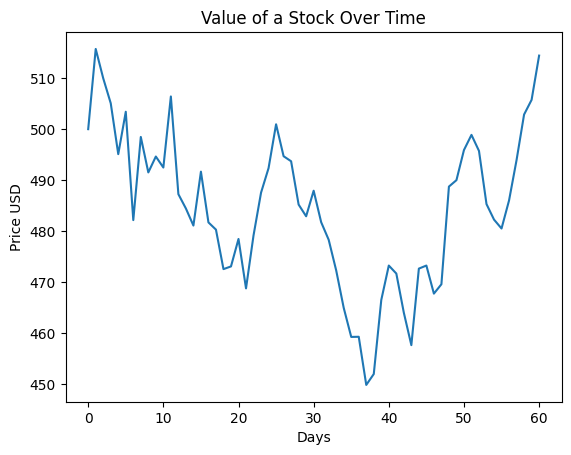

In [32]:
np.random.seed(seed=1)
simTest = simulate_stock(start=500, rate=.08, vol=.3, days=60)
plt.plot(simTest)
plt.xlabel("Days")
plt.ylabel("Price USD")
plt.title("Value of a Stock Over Time")
plt.show()

## Part B: Annual Yield Function
I will now create and test a function that takes a simulated run as its input, and calculates the annual yield
during for that particular run.

In [23]:
def find_yield(run):
    runYield = math.log(run[-1] / run[0]) * (250 / (len(run) - 1))
    runYield = round(runYield, 4)
    return runYield

I am now going to test my function by running it on the previously simulated run.

In [24]:
find_yield(simTest)

0.1186

The next cell will explore the potential variability in the simulated runs by creating
and plotting 25 simulated runs.

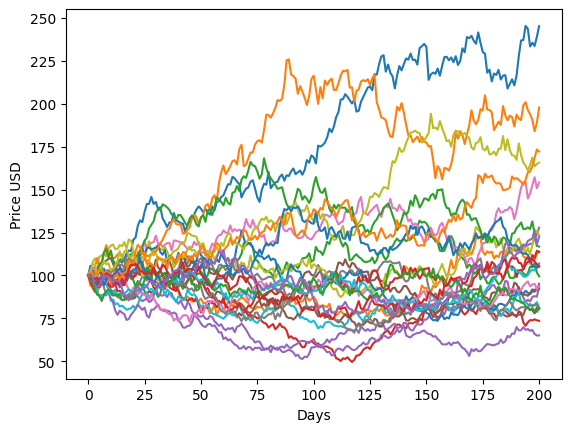

In [37]:
yieldList = []
for i in range(0, 25):
    tempRun = simulate_stock(100, .06, .4, 200)
    tempYield = find_yield(tempRun)
    yieldList.append(tempYield)
    plt.plot(tempRun)
plt.xlabel("Days")
plt.ylabel("Price USD")
plt.show()

The next cell will display the yields for the 25 simulated runs.

In [38]:
print(yieldList)

[1.1211, 0.1581, -0.0064, -0.3838, -0.0851, -0.2691, 0.541, 0.3071, 0.2638, -0.2597, -0.1021, 0.8524, 0.1943, 0.1614, -0.5375, -0.0628, -0.0773, -0.2648, 0.6316, 0.0854, 0.0706, 0.6792, -0.2649, 0.0612, 0.2544]


## Part C: Finding Seeds that Generate Specific Outcomes
The purpose of this section is to work with seeds. Through trial-and-error, I will try to find
seeds that result in specific outcomes.

In the cell below, Stock A has the highest simulated final price.